In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

# Data Import

In [2]:
import yfinance as yf

In [3]:
a1 = yf.Ticker("RELIANCE.NS")
df = a1.history(period="8d" , interval = '5m')

In [4]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-01-18 09:15:00+05:30,1949.099976,1949.750000,1933.599976,1945.000000,0,0,0
2021-01-18 09:20:00+05:30,1945.250000,1948.000000,1940.000000,1942.800049,172561,0,0
2021-01-18 09:25:00+05:30,1942.900024,1943.750000,1935.000000,1935.550049,159677,0,0
2021-01-18 09:30:00+05:30,1935.550049,1937.449951,1930.800049,1933.099976,181015,0,0
2021-01-18 09:35:00+05:30,1933.099976,1942.699951,1932.000000,1942.250000,145431,0,0
...,...,...,...,...,...,...,...
2021-01-28 15:05:00+05:30,1879.150024,1879.949951,1875.250000,1877.000000,199546,0,0
2021-01-28 15:10:00+05:30,1877.449951,1877.599976,1875.000000,1876.949951,220597,0,0
2021-01-28 15:15:00+05:30,1877.000000,1877.000000,1875.050049,1876.699951,334098,0,0


In [ ]:
# other alternatives nsepy / quandl / nsepy

# Bollinger Band Implementation

In [5]:
# calculate Simple Moving Average with 20 days window
a1 = yf.Ticker("TCS.NS")
df = a1.history(period="120d" , interval = '1d')

sma = df.rolling(window=20).mean()

# calculate the standar deviation
rstd = df.rolling(window=20).std()

upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd


df['BB_Upper'] = upper_band['Close']
df['BB_Lower'] = lower_band['Close']

<function matplotlib.pyplot.show(*args, **kw)>

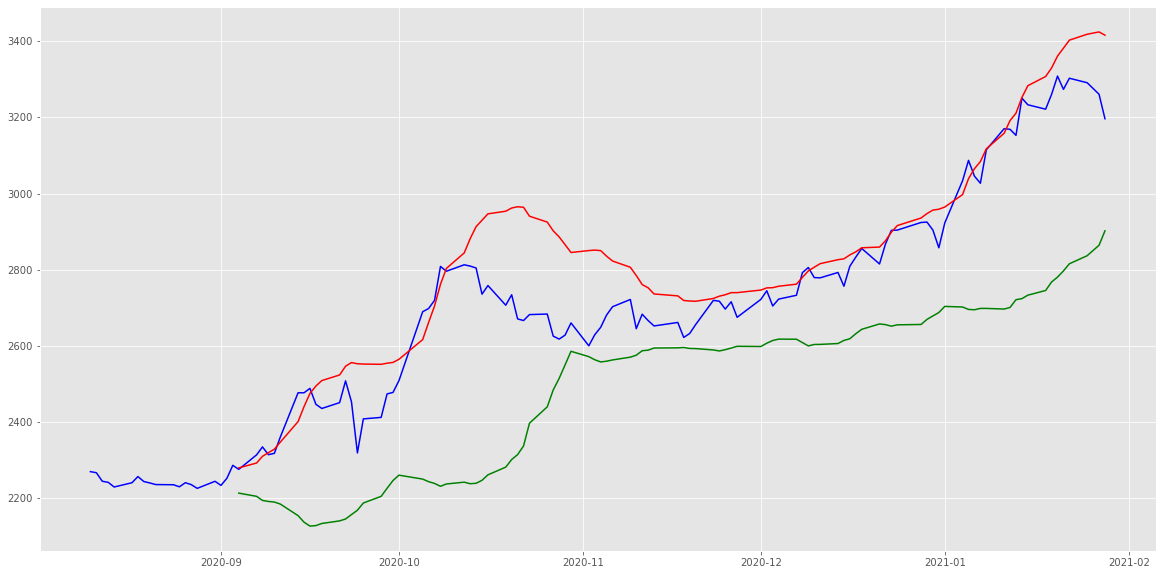

In [6]:
plt.plot(df['Close'], color = 'blue')
plt.plot(df['BB_Upper'], color = 'red')
plt.plot(df['BB_Lower'] , color = 'green')
plt.show

# MACD Implementation

In [11]:
#Function to make MACD lines and signal lines
def MACDlines(df1,a1,a2):
    
    df = df1
    
    df['12 day EMA'] = df['Close'].ewm(span=a1).mean()
    df['26 day EMA'] = df['Close'].ewm(span=a2).mean()
    #MACD line definition
    df['MACD line'] = df['12 day EMA'] - df['26 day EMA']
    #Signal line calculation
    df['Signal Line'] = df['MACD line'].ewm(span=9).mean()
    
    return df

In [13]:
df2 = MACDlines(df,12,26)

In [17]:
df2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,BB_Upper,BB_Lower,New Column,12 day EMA,26 day EMA,MACD line,Signal Line,cross_pos,div_pos
Date,,,,,,,,,,,,,,,,
2020-08-10,2303.774953,2310.731995,2262.082439,2268.791016,2929353,0.0,0,NaN,NaN,4537.582031,2268.791016,2268.791016,0.000000,0.000000,0,0
2020-08-11,2268.989764,2297.811798,2261.635274,2265.908691,2774423,0.0,0,NaN,NaN,4531.817383,2267.229757,2267.294424,-0.064668,-0.035926,0,0
2020-08-12,2274.307075,2282.307480,2232.763543,2243.497314,3415751,0.0,0,NaN,NaN,4486.994629,2257.966979,2258.744354,-0.777375,-0.339799,0,0
2020-08-13,2259.051202,2285.885511,2236.689279,2240.614990,2695682,0.0,0,NaN,NaN,4481.229980,2252.489634,2253.676176,-1.186542,-0.626636,0,0
2020-08-14,2263.026612,2267.300273,2219.396113,2228.390381,2270405,0.0,0,NaN,NaN,4456.780762,2245.941953,2247.812296,-1.870343,-0.996610,0,0


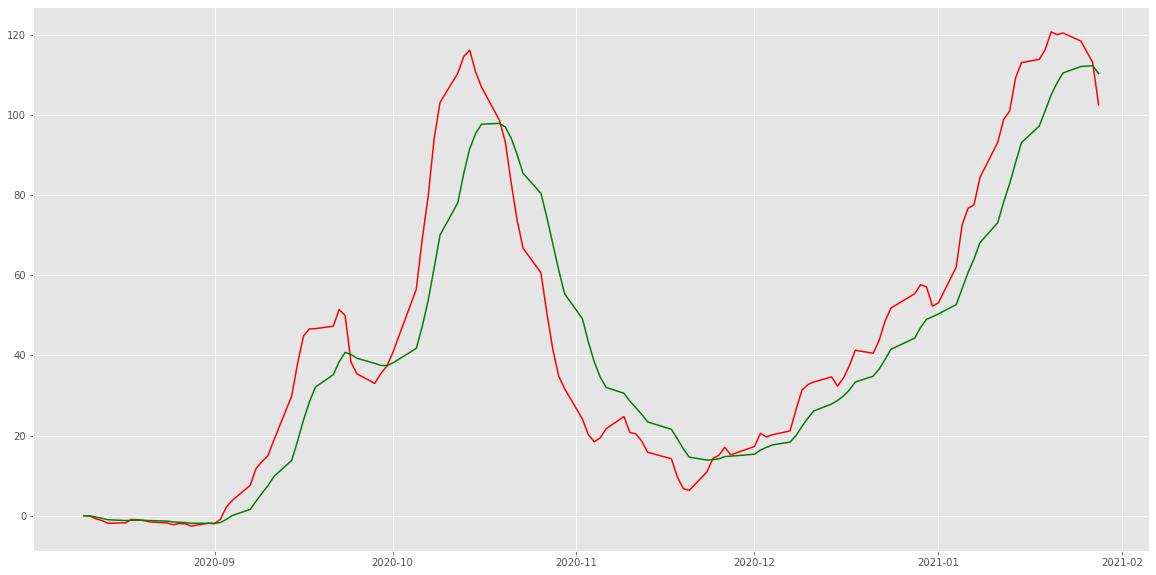

In [15]:
plt.plot(df2['MACD line'] , color = 'red')
plt.plot(df2['Signal Line'] , color = 'green')

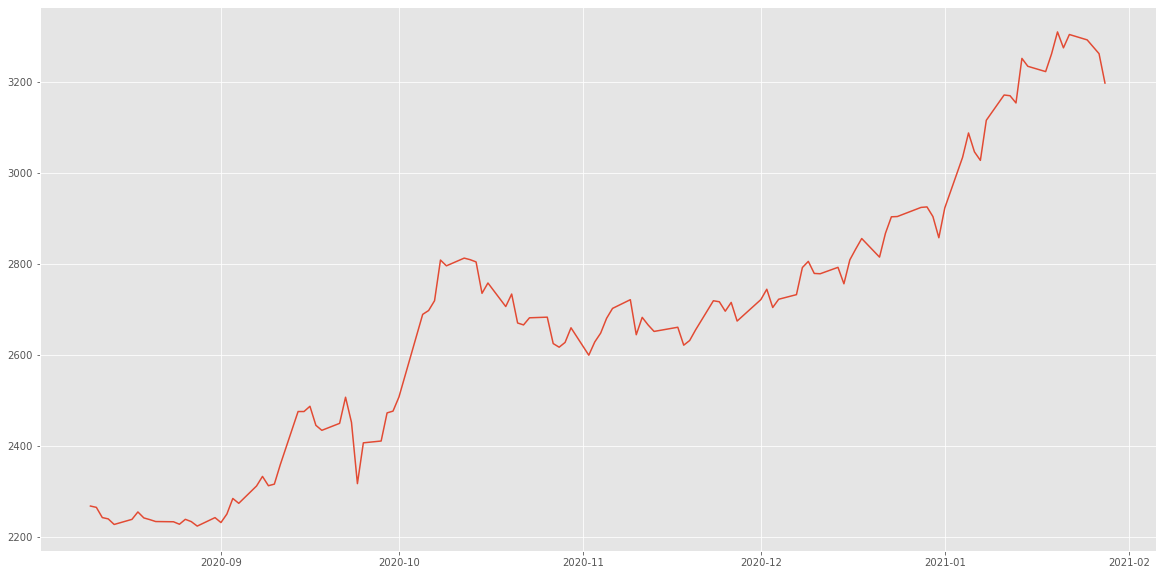

In [16]:
plt.plot(df2['Close'])

# Pivot Points